<h1 style="font-size:4rem;color:#5f5f63; text-align:center; margin-botton:15px;">Heart Failure Prediction</h1>

<img src="https://img.freepik.com/premium-photo/medical-robot-concept-robot-use-medical-white-background-3d-rendering_41325-13.jpg?size=626&ext=jpg&ga=GA1.2.832398409.1672742995&semt=ais"/>

# Libaries importation

In [5]:
#importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#model dumper
import pickle

# DATA LOADING

In [6]:
df = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Exploratory Data Analysis (EDA) 


In [7]:
# getting the number of rows and columns
df.shape

(299, 13)

In [8]:
# getting the structure and contents of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
#getting statistical information
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Visualization of Data


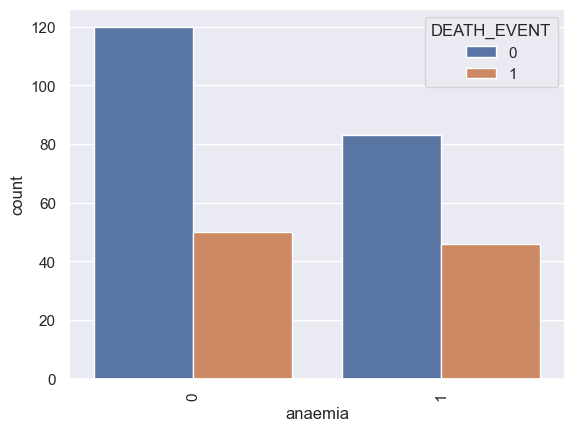

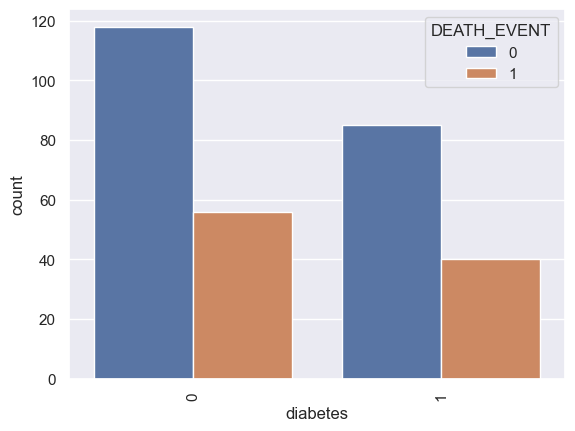

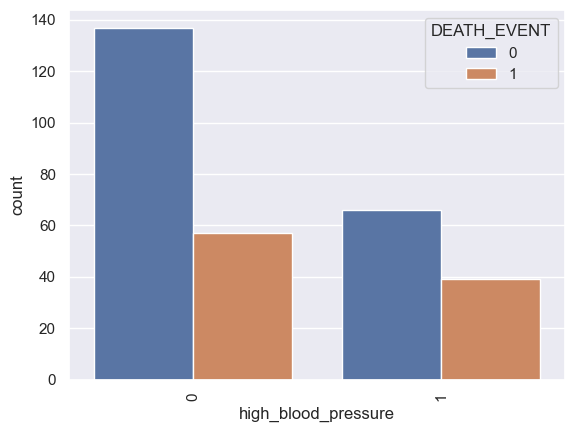

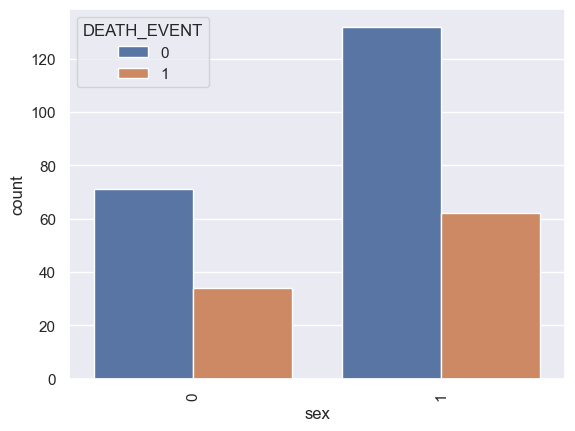

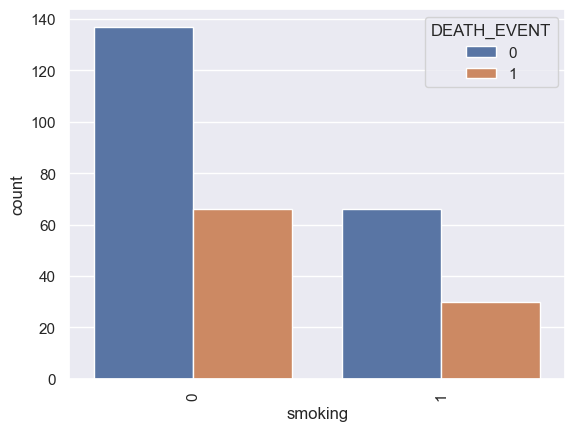

In [10]:
#visualizing the count of 'DEATH_EVENT' with respect to each of the attributes listed in the attributes list.
def plot_deaths_by_attribute(df, attribute):
    g = sns.countplot(df[attribute], hue=df.DEATH_EVENT)
    plt.xticks(rotation=90)
    plt.show()

attributes=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for attribute in attributes:
    plot_deaths_by_attribute(df, attribute)
    

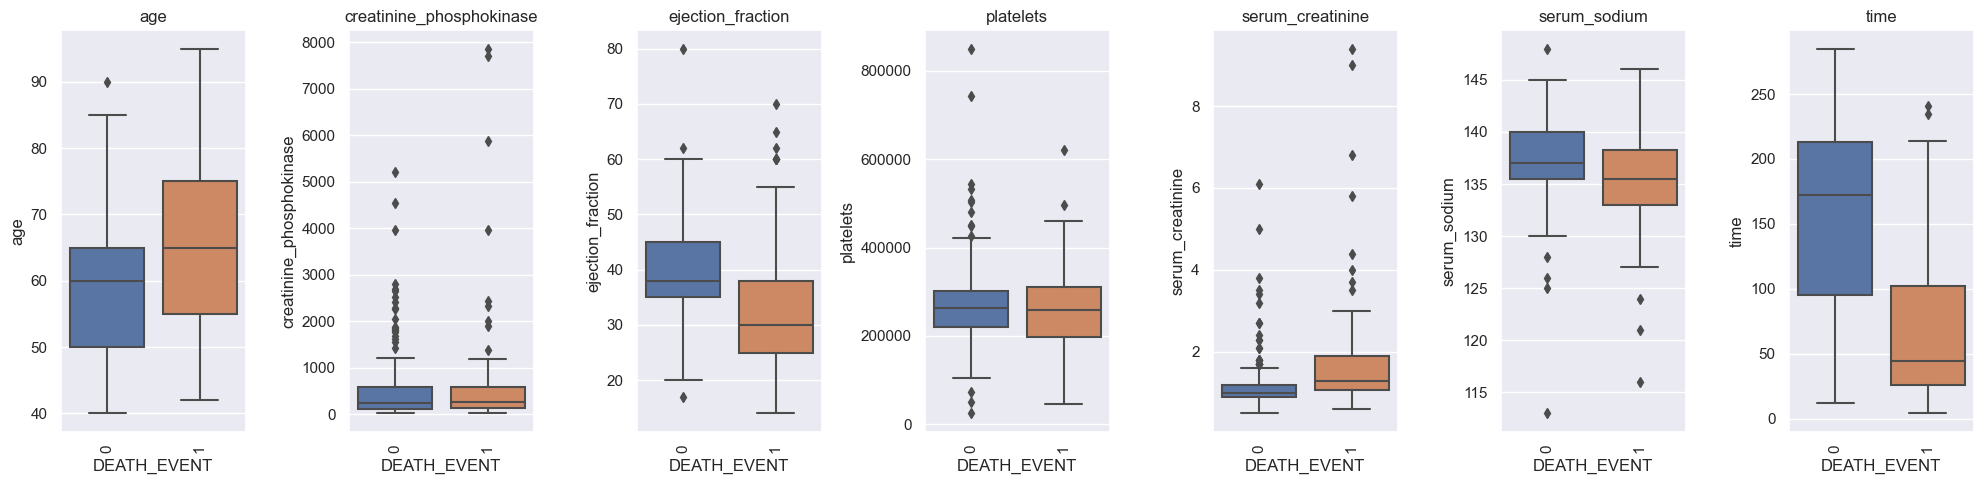

In [11]:
#comparimg the distribution of the attribute values between patients who died and those who did not die during follow-up. 
attributes=['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, axs = plt.subplots(nrows=1, ncols=len(attributes), figsize=(20, 5))

for i, attribute in enumerate(attributes):
    sns.boxplot(y=df[attribute], x=df.DEATH_EVENT, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_title(attribute)

plt.tight_layout()
plt.show()

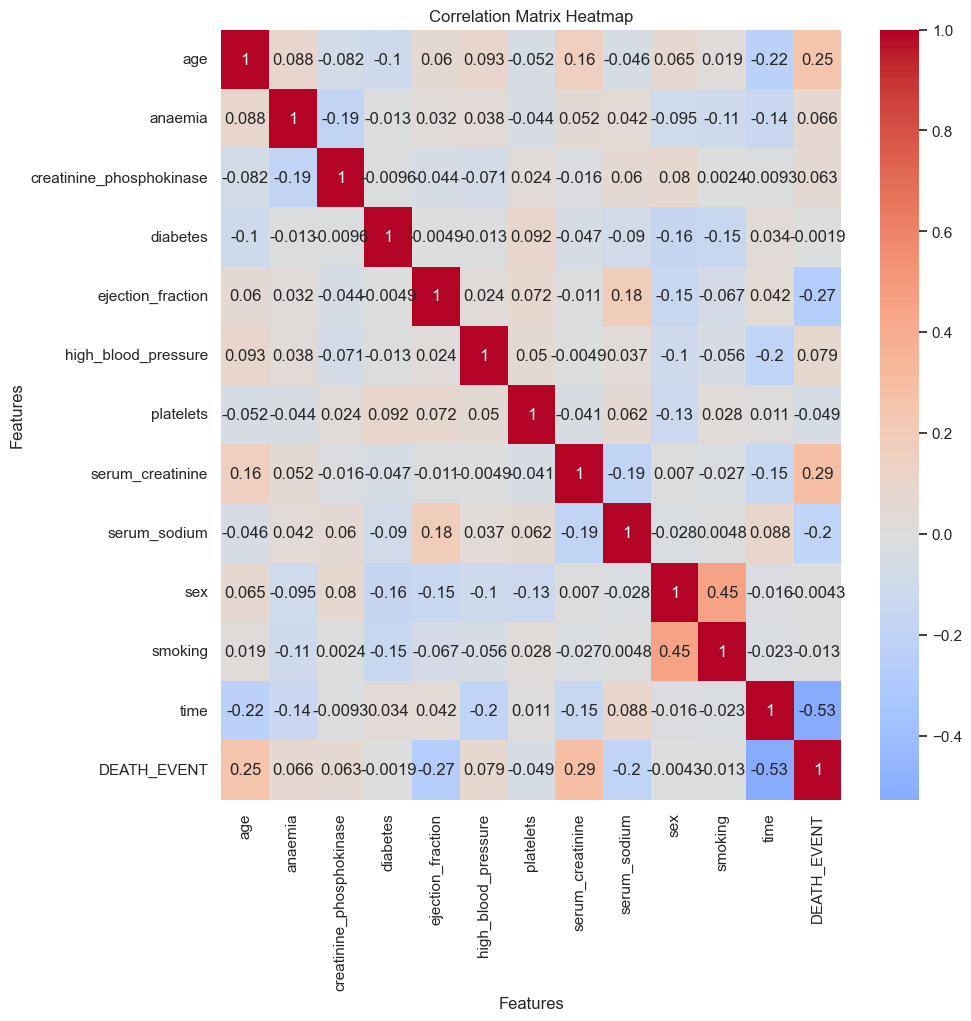

In [12]:
#creating heatmap to visualize the correlation between features in the dataframe

# Create correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, ax=ax)

# Set axis labels
ax.set_xlabel('Features')
ax.set_ylabel('Features')
ax.set_title('Correlation Matrix Heatmap')

# Show plot
plt.show()

# Missing data


In [13]:
#using insa() to find out all the missing values from the dataset
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Modeling

In [14]:
#splitting the dataset into predictors and target variable
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [15]:
#train_test_split()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=2)

In [16]:
#Models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))

In [17]:
# Evaluating models
models_rate = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=20)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    models_rate.append(results)
    names.append(name)
    print('%s: %f (%f)' %(name, results.mean(), results.std()))


LR: 0.838258 (0.123540)
DT: 0.757576 (0.125218)
LDA: 0.793939 (0.118618)
KNN: 0.638258 (0.087822)
NB: 0.753409 (0.114152)
SVM: 0.665152 (0.037697)
RFC: 0.811742 (0.128816)


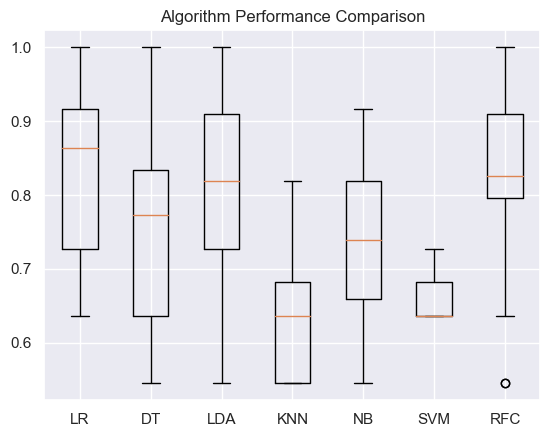

In [18]:
# Comparing the performance of the algorithms
fig, ax = plt.subplots()
ax.boxplot(models_rate)
ax.set_xticklabels(names)
ax.set_title("Algorithm Performance Comparison")
plt.show()

<p> Based on the observation from the above plot I concluded that LogisticRegression() and RandomForestClassifier() are best performing algorithms, so I will continue with them<p/>

In [19]:
#Logistic Regression Classifier
lRegrssion = LogisticRegression(solver='liblinear', multi_class='ovr')
scores = cross_val_score(lRegrssion, X, y, cv=5) # use 5-fold cross-validation


#Random Forest Classifier 
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
pred_y=rf.predict(X_val)

#Accuracy
print('Accuracy scores:', scores)
print('Mean accuracy:', scores.mean())



Accuracy scores: [0.36666667 0.96666667 0.9        0.81666667 0.6779661 ]
Mean accuracy: 0.745593220338983


In [20]:
# RandomForestClassifier()

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Validation accuracy:', grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Validation accuracy: 0.8437373737373738


In [25]:


# create and fit a logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')
logreg.fit(X_train, y_train)

# dump the model to a file
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

In [22]:
# fit the model on the entire dataset
rf.fit(X, y)

# dump the fitted model into a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
    print('done')

done


In [35]:
import numpy as np

# create a 1D array as input to the predict method
x_test = np.array([20,0,122,0,20,0,79,1.3,29,1,1,7])

# wrap the input in a list to create a 2D array
x_test_2d = [x_test]

# make the prediction
prediction = rf.predict(x_test_2d)

print(prediction)

[1]
